In [20]:
import cv2
import numpy as np
input_dir = 'dataset/test'
output_dir = 'dataset/output'

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

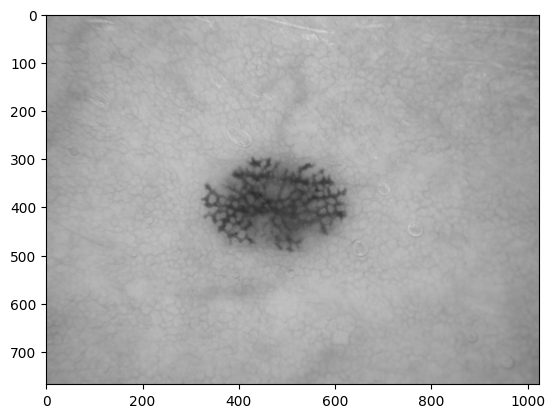

In [22]:
img = cv2.imread(input_dir + '/SL_047.jpg', 0)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert BGR to RGB
plt.imshow(img_rgb)
plt.show()

Otsu's Binarization 

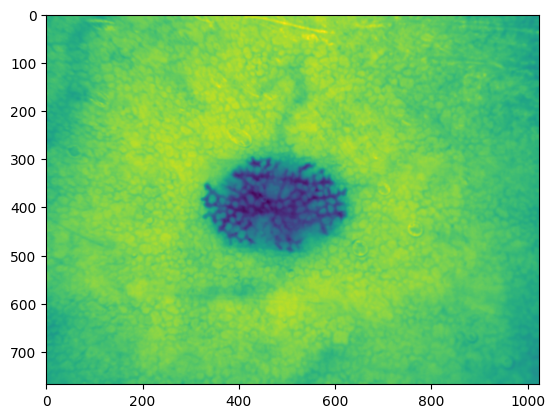

In [23]:
blur = cv2.GaussianBlur(img,(7,7),0)
plt.imshow(blur)
plt.show()

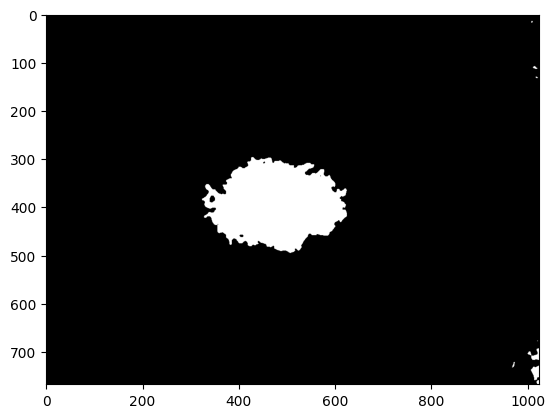

In [24]:
ret3,th4 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(th4,cmap='gray')
plt.show()

In [25]:
h, w = th4.shape
mask_start = int(w*0.1)
mask_end = w-mask_start

# mask_start = int(h/2)
# mask_end = int(w/2)
# mask_radius = int(h*0.3)

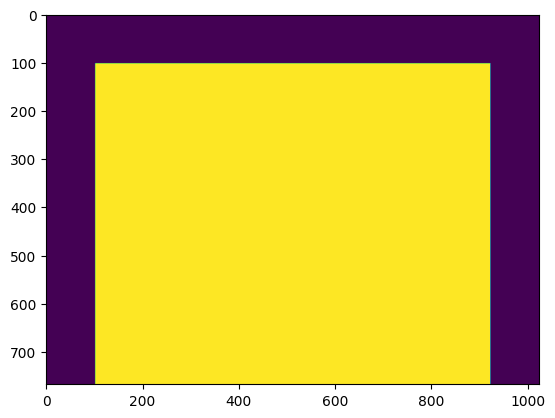

In [26]:
rectangle_mask = np.zeros(th4.shape, np.uint8) 
cv2.rectangle(rectangle_mask, (mask_start, mask_start), (mask_end, mask_end), 255, -2) 
# cv2.circle(rectangle_mask, (mask_end, mask_start), mask_radius, 255, -2) 
plt.imshow(rectangle_mask)
plt.show()

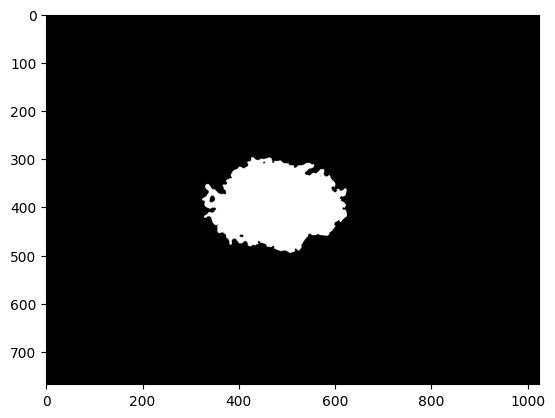

In [27]:
intersection = cv2.bitwise_and(th4, rectangle_mask)
plt.imshow(intersection, cmap='gray')
plt.show()

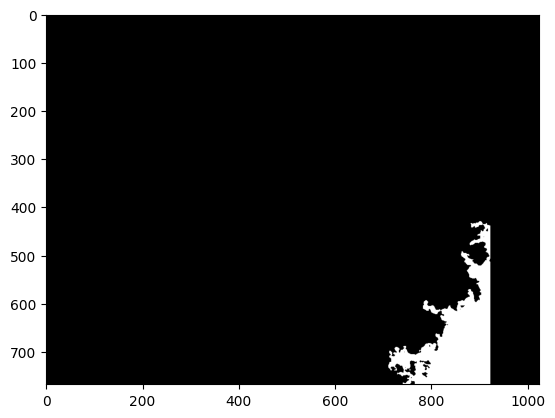

In [19]:
cnts, _ = cv2.findContours(intersection, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnt = max(cnts, key=cv2.contourArea)

out = np.zeros(intersection.shape, np.uint8)
cv2.drawContours(out, [cnt], -1, 255, cv2.FILLED)
ctr_mask = cv2.bitwise_and(intersection, out)
plt.imshow(ctr_mask,cmap='gray')
plt.show()

In [10]:
def region_growing(image, seed_point):
    # Create a mask for the connected region
    mask = np.zeros_like(image)
    
    # Parameters for region growing
    connectivity = 8
    new_mask_val = 255
    seeds = [seed_point]

    while len(seeds) > 0:
        # Get the current seed point
        current_point = seeds.pop(0)

        # Check if the current point is within the image boundaries
        if 0 <= current_point[0] < image.shape[0] and 0 <= current_point[1] < image.shape[1]:
            # Check if the pixel is unlabeled
            if mask[current_point] == 0 and image[current_point] != 0:
                mask[current_point] = new_mask_val

                # Add neighboring pixels to the seed list
                i, j = current_point
                seeds.extend([(i-1, j-1), (i-1, j), (i-1, j+1), (i, j-1), (i, j+1), (i+1, j-1), (i+1, j), (i+1, j+1)])

    return mask

In [11]:
contours_A, _ = cv2.findContours(ctr_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Assuming there is only one contour in image A
contour_A = contours_A[0]

# Find the centroid of the region in image A
M = cv2.moments(contour_A)
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])

# Use the centroid as the seed point for region growing in image B
connected_region_mask_B = region_growing(th4, (cy, cx))

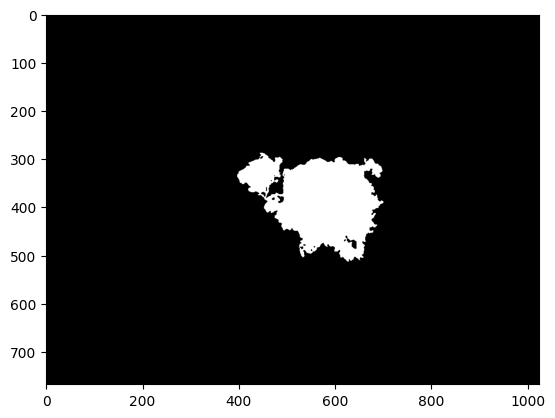

In [12]:
plt.imshow(connected_region_mask_B,cmap='gray')
plt.show()